In [1]:
from keras.layers import Dense
%matplotlib inline
import keras
from keras.models import Sequential
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import scipy
import math
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
path_text='text or no text dataset/text/'
path_notext = 'text or no text dataset/no text/'

files = os.listdir(path_text)[1:]
files_notext = os.listdir(path_notext)[1:]

text_data = pd.DataFrame(np.empty((1,1024)))
non_text_data = pd.DataFrame(np.empty((1,1024)))

In [3]:
i=0
for images in files:
    img = np.asarray(Image.open(path_text+images).resize((32,32),Image.ANTIALIAS))
    text_data.loc[i,:] = img.ravel()
    i+=1
i=0
for images in files_notext:
    img = np.asarray(Image.open(path_notext+images).resize((32,32),Image.ANTIALIAS))
    non_text_data.loc[i,:] = img.ravel()
    i+=1

In [4]:
non_text_data['text_label']=0
text_data['text_label'] = 1

In [5]:
data = pd.concat([text_data,non_text_data])

In [95]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data.iloc[:,:1024],data['text_label'],test_size=0.1)

In [96]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
train_x = sc_x.fit_transform(train_x)
test_x = sc_x.transform(test_x)

# Using CNN for the classification algorithm

In [97]:
train_x1 = train_x.reshape((train_x.shape[0],32,32,1))
test_x1 = test_x.reshape((test_x.shape[0],32,32,1))

In [132]:
clf1 = Sequential()
clf1.add(Convolution2D(32,(3,3),input_shape=(32,32,1),activation='relu'))
clf1.add(MaxPooling2D(2,2))
clf1.add(Convolution2D(128,(3,3),activation='relu'))
clf1.add(MaxPooling2D(2,2))
clf1.add(Flatten())
clf1.add(Dense(activation='relu',units=500,kernel_initializer='uniform'))
clf1.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))
clf1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [133]:
clf1.fit(train_x1,train_y,epochs=6)

Epoch 1/6
4487/4487 [==============================] - 20s 5ms/step - loss: 0.2095 - acc: 0.9160
Epoch 2/6
4487/4487 [==============================] - 21s 5ms/step - loss: 0.0784 - acc: 0.9706
Epoch 3/6
4487/4487 [==============================] - 14s 3ms/step - loss: 0.0444 - acc: 0.9848
Epoch 4/6
4487/4487 [==============================] - 16s 3ms/step - loss: 0.0440 - acc: 0.9844
Epoch 5/6
4487/4487 [==============================] - 16s 4ms/step - loss: 0.0216 - acc: 0.9922
Epoch 6/6
4487/4487 [==============================] - 15s 3ms/step - loss: 0.0116 - acc: 0.9951


In [134]:
y_pred1 = np.around(clf1.predict(test_x1))

In [135]:
confusion_matrix(test_y,y_pred1)

array([[247,   3],
       [  2, 247]])

# Some preprocessing and checks for connected components

In [136]:
# img    =    cv2.imread('text or no text dataset/IIIT_STR_V1.0/imgDatabase/img_000066.jpg',0)
# plt.imshow(img)

In [137]:
# img[300]

In [138]:
# cc  = cv2.connectedComponents(img)[1]

In [139]:
# con_img = {}
# for label in np.unique(cc[cc>0]):
#     image = np.zeros(cc.shape)
#     indices = np.where(cc==label)
#     image[indices] = 1
#     con_img[label] = image

In [140]:
# con_img

# Now we'll try to apply this model on a few images

In [141]:
img    =    cv2.imread('text or no text dataset/test images/test_13.jpg',0)
a = input('Bright text on dark background? Press Y/y for yes and any other key for no.' )
if a=='y' or a=='Y':
    otsu_1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
#     th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,25,3)
else:
    otsu_1 = 255-cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
#     th2 = 255- cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,25,3)


# connected components
cc  = cv2.connectedComponents(np.uint8(otsu_1))[1]

# creating imgage for every single label in the connected components
con_img = {}
for label in np.unique(cc[cc>0]):
    image = np.zeros(cc.shape)
    indices = np.where(cc==label)
    image[indices] = 1
    con_img[label] = image
    

# plt.savefig('plot_3.jpg')

# plt.figure(figsize=[20,10])
# plt.subplot(1,3,1)
# plt.imshow(img)

# plt.subplot(1,3,2)
# plt.imshow(otsu_1)

# plt.subplot(1,3,3)
# plt.imshow(cc)


Bright text on dark background? Press Y/y for yes and any other key for no.y


In [142]:
# plt.imshow(img)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


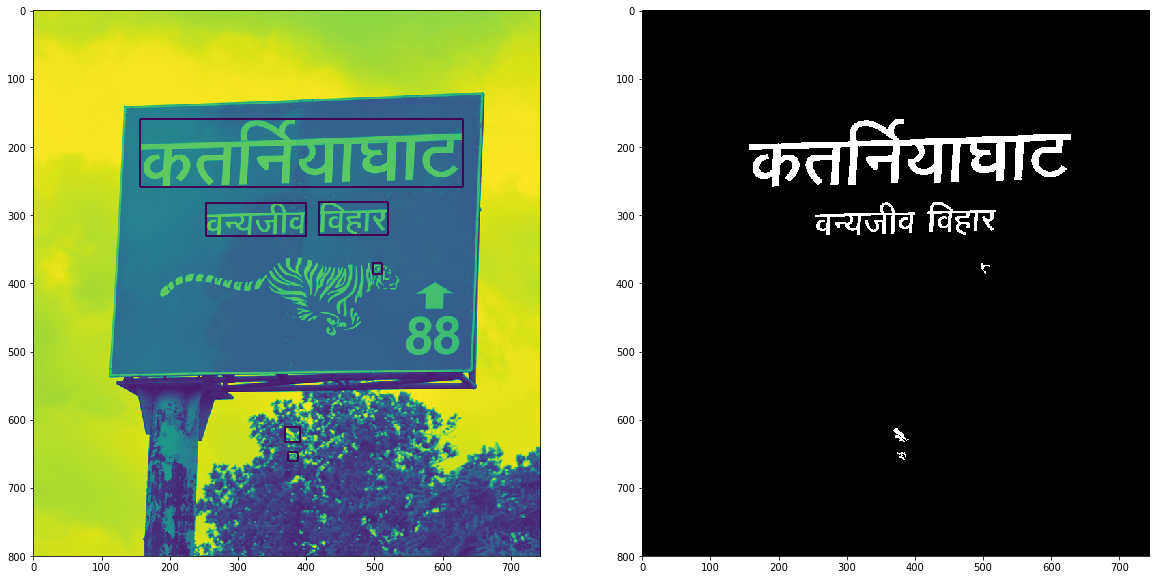

In [143]:
tot1=0
i=1
mask = {}
i=1
for elem in con_img.keys():
    x,y,w,h = cv2.boundingRect(np.uint8(con_img[elem]))
    imng = img[y:y+h,x:x+w]
    imng =  scipy.misc.imresize(imng,(32,32)).ravel().reshape(1,1024)
    imng = sc_x.transform(imng)
    imng = imng.reshape((1,32,32,1))
#     print(elem,np.around(classifier.predict(imng)))
    if np.around(clf1.predict(imng))==1.0:
#         print('yuhoo')
        tot1+=con_img[elem]
#         mask[i]=con_img[elem]
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        i+=1
        
plt.figure(figsize=[20,20])
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(tot1,'gray')